In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [3]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
# Initialize the neural network and loss function
net = Net()
criterion = nn.CrossEntropyLoss()

# Define the optimizers: SGD, Adam, and RMSprop
sgd_optimizer = optim.SGD(net.parameters(), lr=0.01)
adam_optimizer = optim.Adam(net.parameters(), lr=0.001)
rmsprop_optimizer = optim.RMSprop(net.parameters(), lr=0.01)

In [5]:
# Lists to store losses for each optimizer
sgd_losses, adam_losses, rmsprop_losses = [], [], []

# Training loop
for epoch in range(10):
    running_loss_sgd, running_loss_adam, running_loss_rmsprop = 0.0, 0.0, 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients for each optimizer
        sgd_optimizer.zero_grad()
        adam_optimizer.zero_grad()
        rmsprop_optimizer.zero_grad()

        # Forward pass
        outputs_sgd = net(inputs)
        outputs_adam = net(inputs)
        outputs_rmsprop = net(inputs)

        # Calculate the losses
        loss_sgd = criterion(outputs_sgd, labels)
        loss_adam = criterion(outputs_adam, labels)
        loss_rmsprop = criterion(outputs_rmsprop, labels)

        # Backpropagation and optimization
        loss_sgd.backward()
        loss_adam.backward()
        loss_rmsprop.backward()

        sgd_optimizer.step()
        adam_optimizer.step()
        rmsprop_optimizer.step()

        running_loss_sgd += loss_sgd.item()
        running_loss_adam += loss_adam.item()
        running_loss_rmsprop += loss_rmsprop.item()

    sgd_losses.append(running_loss_sgd)
    adam_losses.append(running_loss_adam)
    rmsprop_losses.append(running_loss_rmsprop)

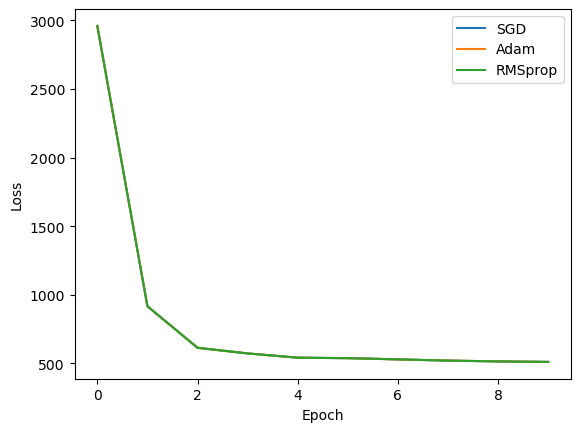

In [6]:
# Plot the losses for each optimizer
plt.plot(sgd_losses, label='SGD')
plt.plot(adam_losses, label='Adam')
plt.plot(rmsprop_losses, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()